In [1]:
import io 
import json
from ast import literal_eval

from glob import glob

from PIL import Image
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import timm
from torchvision import transforms
import tarfile 

from liptrf.models.vit import L2Attention, ViT
from liptrf.models.layers import trunc, l2_normalize

/home/versag/miniconda3/envs/liptrf/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Byte2Image(object):
    def __call__(self, sample):
        return Image.open(io.BytesIO(sample))

def identity(x):
    return x

In [4]:
model = timm.create_model('vit_base_patch16_224', pretrained=True)

In [38]:
fin = open('../imagenet-sample-images/imagenet1000_clsidx_to_labels.txt', 'r')
class_map = literal_eval(fin.read())
fin.close()

fin = open('../imagenet-sample-images/imagenet_class_index.json', 'r')
class_map2 = json.load(fin)
fin.close()

In [4]:
image_names = glob('../imagenet-sample-images/*JPEG')


In [34]:
idx = 2
print (image_names[idx])
img = Image.open(image_names[idx])
img = trf(img).unsqueeze(0)
probas = model(img)
print (class_map[torch.argmax(probas).item()])

../imagenet-sample-images/n01484850_great_white_shark.JPEG
great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias


In [33]:
# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
trf = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor()])

In [12]:
tfile = tarfile.open('../data/val/val-01.tar')

In [50]:
ext = tfile.extractfile('01024.x.ext.txt').read()
img = tfile.extractfile('01024.x.img.pil').read()
cls_txt = tfile.extractfile('01024.y.class.txt').read()
lbl = tfile.extractfile('01024.y.cls').read()

In [51]:
cls_txt

b'n02500267'

In [42]:
bio = Byte2Image()

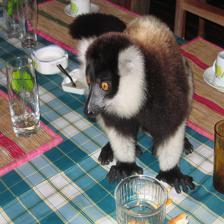

In [43]:
bio(img)

In [44]:
cls_txt

b'n02500267'

In [45]:
lbl

b'75'

In [47]:
imgt = trf(bio(img)).unsqueeze(0)
probas = model(imgt)
print (class_map2[str(torch.argmax(probas).item())])

['n02500267', 'indri']


In [36]:
torch.argmax(probas).item()

384

In [58]:
class_map_rev = {}
for k in class_map2.keys():
    class_map_rev[class_map2[k][0]] = int(k)